<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀 Spaceship Titanic Kaggle Competition Complete Guide
</p>
</div>

<center>
<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width=800 height=500 />
</center>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Notebook- </b> Goal </h2>

<div style="font-family:Verdana;background-color:yellow;padding:30px;font-size:17px;color:#034914">

💡 In this project, we will perform Binary Classification on the Titanic Spaceship Dataset (Kaggle Competition).<br>

💡 The objective of this project is to predict whether a person will be transported to an alternate dimension or not.<br>
</div>


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Libraries
</p>
</div>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Datasets
</p>
</div>

In [6]:
train_df = pd.read_csv("csv_files/train.csv")
test_df = pd.read_csv("csv_files/test.csv")

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Data- </b> Description </h2>

> * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
> * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.<br>
> * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>
> * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
> * **Destination** - The planet the passenger will be debarking to.<br>
> * **Age** - The age of the passenger.<br>
> * **VIP** - Whether the passenger has paid for special VIP service during the voyage.<br>
> * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
> * **Name** - The first and last names of the passenger.<br>
> * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Data
</p>
</div>

### 1.Checking Dimensions of Data

In [7]:
print("Training Dataset shape is: ",train_df.shape)
print("Testing Dataset shape is: ",test_df.shape)

Training Dataset shape is:  (8693, 14)
Testing Dataset shape is:  (4277, 13)


### 2. Showing Training & Testing Data

In [8]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 In our testing dataset, we don't have the Transported feature, but it is present in the training data.</li>
<li>💡 Therefore, we need to build a model using the training data and then make predictions for our testing data.</li>
</ul>
</div>


### 3. Checking Duplicates Data

In [10]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")


Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 There are no duplicate values in either our training or testing datasets.</li>
<li>💡 Therefore, we don't have any type of data leakage in our dataset.</li>
</ul>
</div>


### 4. Checking Data-Types of Training & Testing Data

In [11]:
print("Data Types of features of Training Data is:")
print(train_df.dtypes)
print("\n"+"-"*100)
print("\nData types of features of Testing Data is:")
print(test_df.dtypes)

Data Types of features of Training Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------

Data types of features of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 The CryoSleep and VIP features contain boolean values, but their data type is object.</li>
<li>💡 We need to convert their data types to boolean.</li>
<li>💡 We will perform this conversion during the data preprocessing stage.</li>
</ul>
</div>


### 5. Checking Total Number & Percentage of Missing Values in Training Dataset

In [12]:
df1 = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1

,Number of Missing values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


### 6. Checking Total Number & Percentage of Missing Values in Testing Data.

In [13]:
df2 = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df2["% of Missing Values"] = round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2).values
df2

,Number of Missing values,% of Missing Values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 There is a very small percentage of missing values in both the training and testing data.</li>
<li>💡 Rather than dropping these missing values, we will fill or replace them with the most suitable values according to the data.</li>
</ul>
</div>


### 7. Checking Cardinality of Categorical features.

In [14]:
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 We observe that the PassengerId, Cabin, and Name features of both datasets have high cardinality.</li>
<li>💡 Typically, features with high cardinality are dropped. However, in this project, we will perform feature engineering and create new features from these features.</li>
<li>💡 More data often leads to better predictions by the model.</li>
</ul>
</div>


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

### 1. Visualizing Target Feature "Transported"

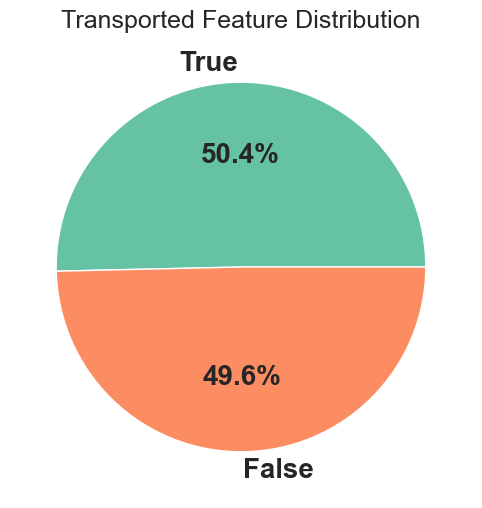

In [15]:
plt.figure(figsize=(10,6))
plt.pie(train_df["Transported"].value_counts(),labels=train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Transported Feature Distribution");

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 Our Transported feature is highly balanced.</li>
<li>💡 Therefore, we don't need to use techniques like under-sampling or over-sampling.</li>
</ul>
</div>


### 2.Visualizing AGE Feature

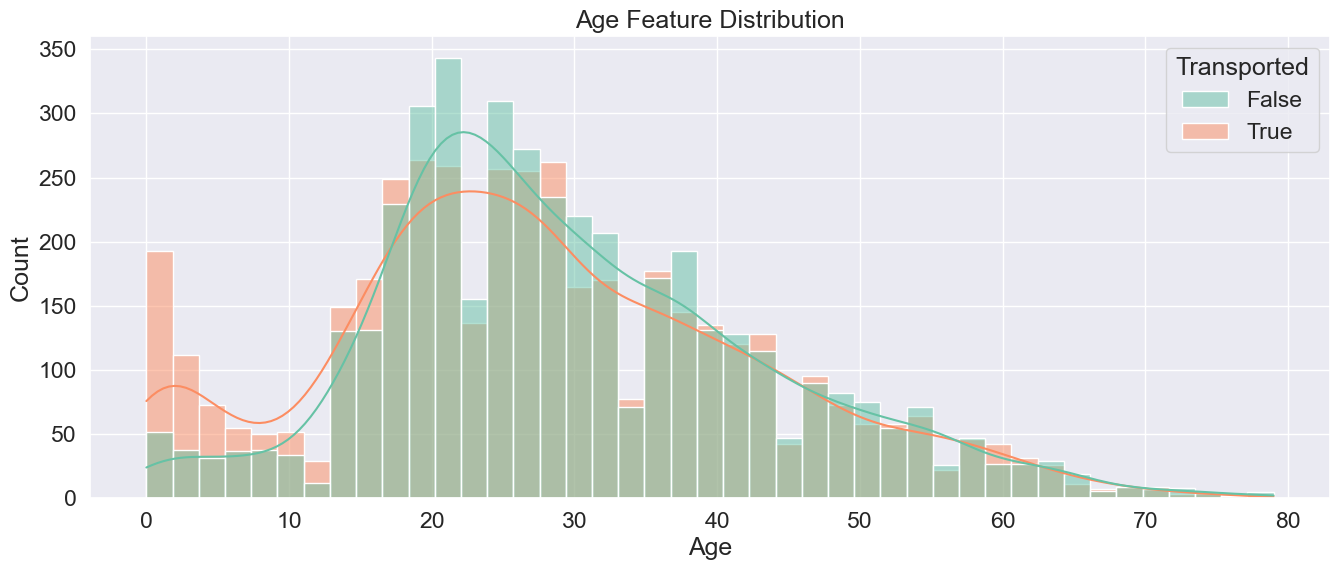

In [16]:
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2")
plt.title("Age Feature Distribution");

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 Most of the passengers were between the ages of 18-32.</li>
<li>💡 Passengers aged 0-18 are highly transported compared to not transported passengers, especially for those who were newborn.</li>
<li>💡 Passengers aged 18-32 are comparatively less transported compared to not transported passengers.</li>
<li>💡 Passengers above 32 seem to be equally transported compared to not transported passengers.</li>
</ul>

<h2>Insights</h2>
<ul>
<li>💡 We can create a new feature called Age-Category from age, in which we can split ages into different categories.</li>
</ul>
</div>


### 3. Visualizing All Expenditure Features ("RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck")

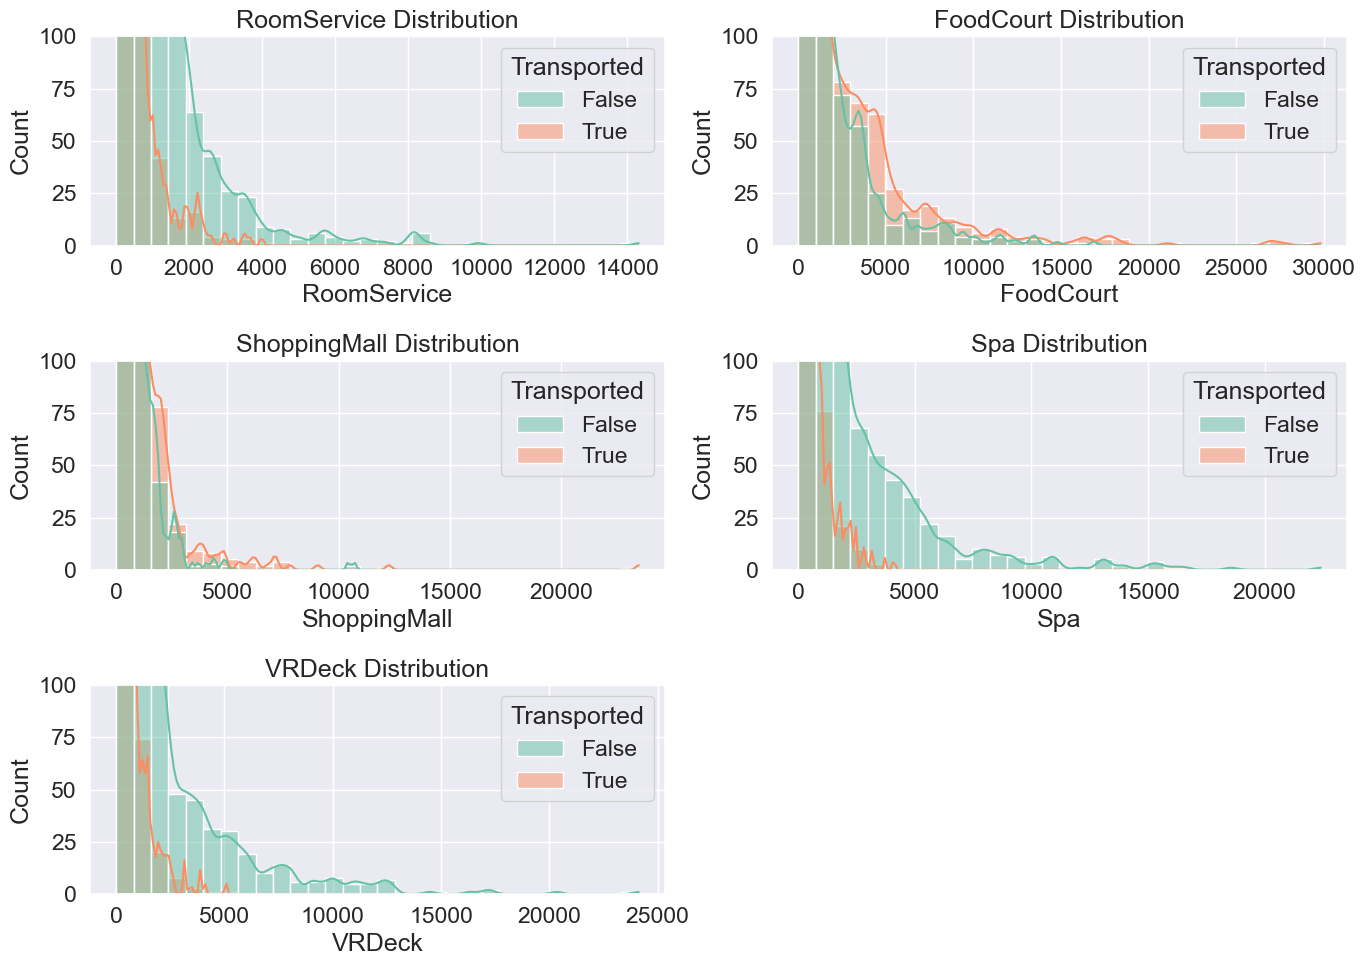

In [17]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 Most passengers seem not to expend any money.</li>
<li>💡 Since most expenses are 0, values with higher expenses are considered outliers in our data.</li>
<li>💡 RoomService, Spa, and VRDeck seem to have similar distributions.</li>
<li>💡 Similarly, FoodCourt and ShoppingMall exhibit similar distributions.</li>
<li>💡 All expenditure features have right-skewed distributions.</li>
<li>💡 Passengers with lower expenses are more likely to be transported than those with high expenses.</li>
</ul>

<h2>Insights</h2>
<ul>
<li>💡 Since all expenditure features have right-skewed distributions, we will transform these features to normal distributions using log-transformation before model building.</li>
<li>💡 We can create a new feature called Total Expenditure, indicating the total expenses of all different expenditures done by the passengers.</li>
<li>💡 Since most people's expenses are 0, we can create a new boolean feature called No Spending, indicating whether the passenger's total expense is 0 or not.</li>
<li>💡 We can split Total Expenditure into different categories of expenditure like Low, Medium, and High Expenses and create another new feature called Expenditure Category.</li>
</ul>
</div>



### 4. Visualizing Categorical Features ("HomePlanet", "CryoSleep", "Destination", "VIP")

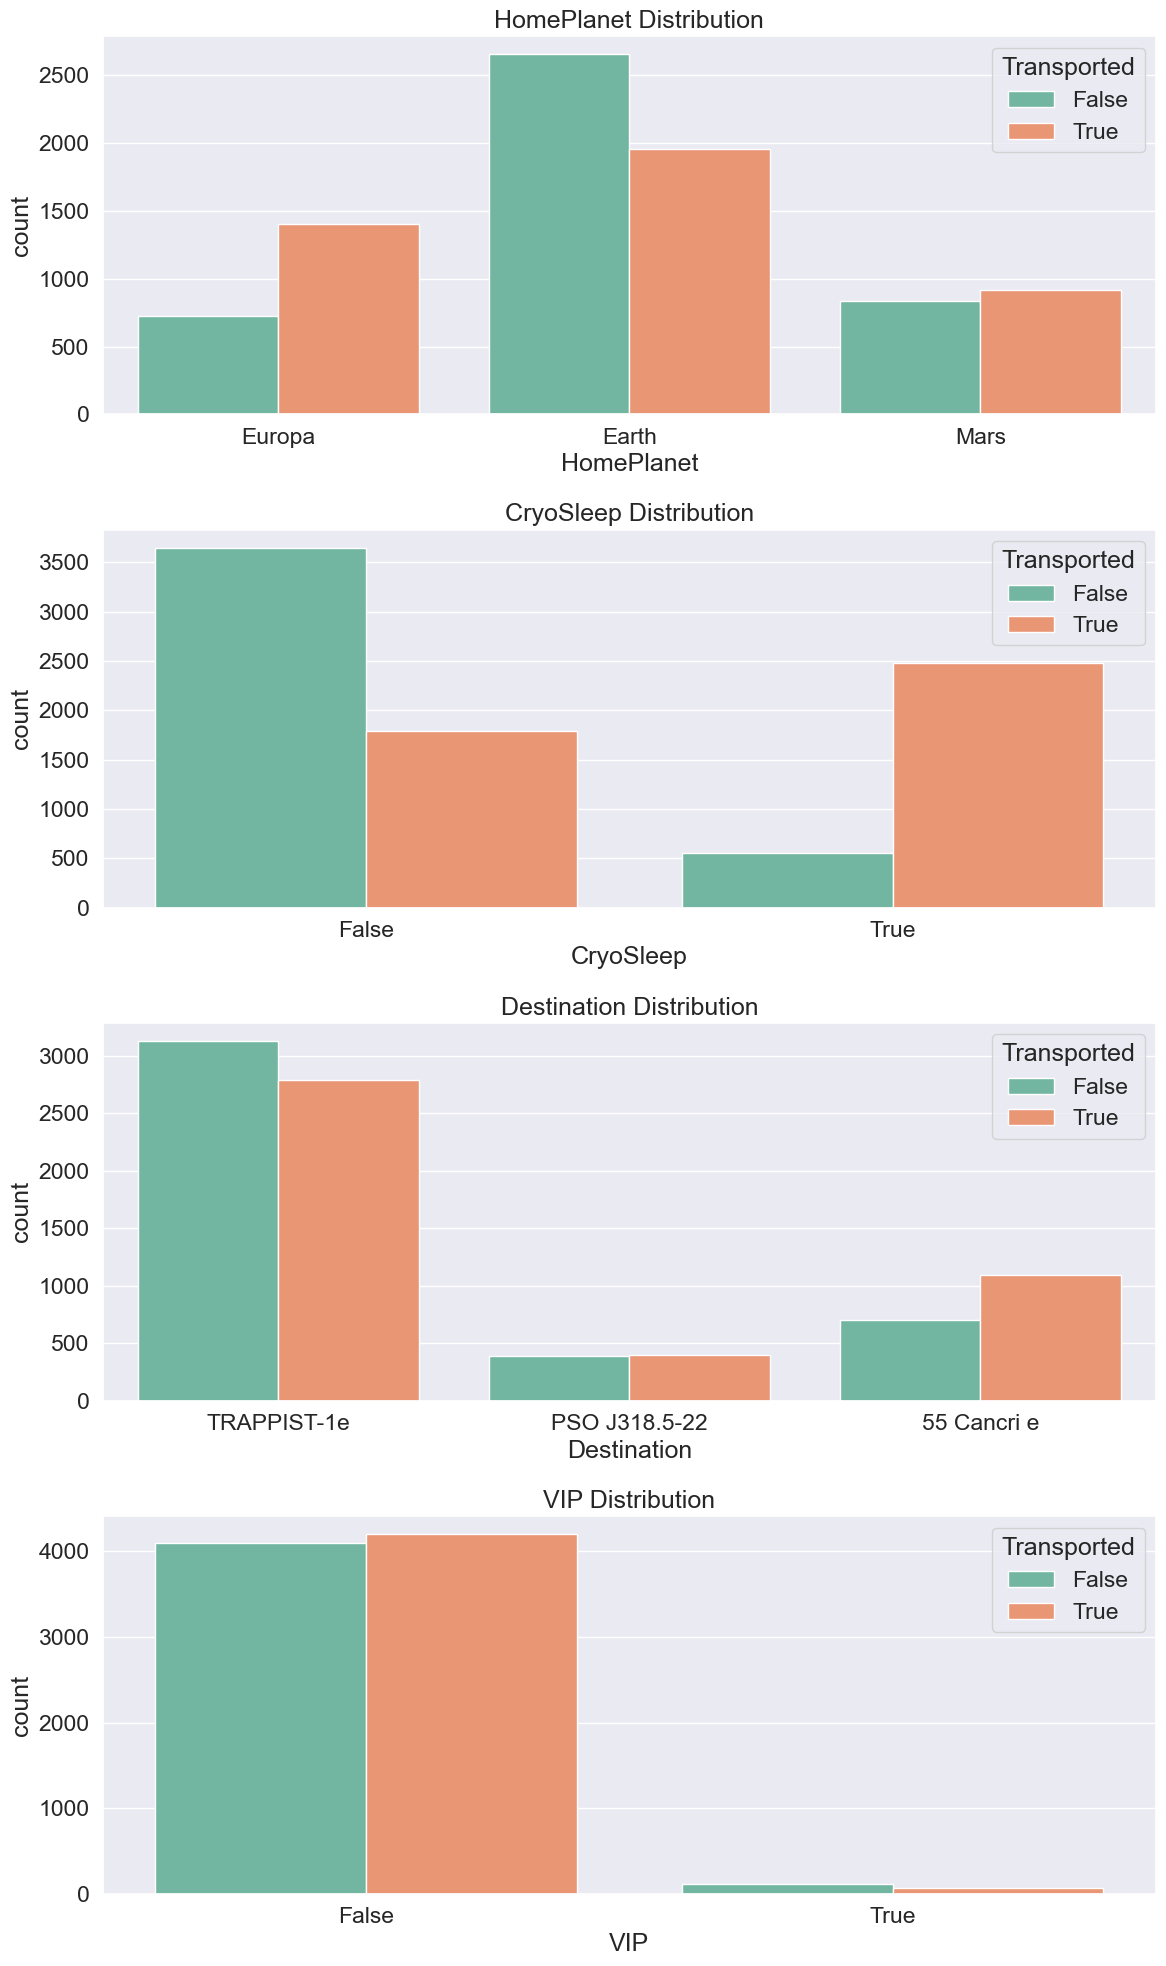

In [18]:
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 In the HomePlanet feature, we observe that most passengers are from Earth. However, passengers from Earth are comparatively less transported, passengers from Mars are equally transported, and passengers from Europa are highly transported.</li>
<li>💡 In the Destination feature, we observe that most passengers are transported to Trappist-1e.</li>
<li>💡 Regarding the VIP feature, one category is dominating significantly over the others. Therefore, this feature doesn't seem to be useful and may lead to overfitting in our model.</li>
<li>💡 It's advisable to drop the VIP feature before building the model.</li>
</ul>
</div>


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>NOTE</h2>
<ul>
<li>💡 We have visualized all the features except PassengerId, Name, and Cabin features. We can't visualize these features because they have high cardinality.</li>
<li>💡 We will visualize these features after creating new features from these old features.</li>
</ul>
</div>


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Feature Engineering
</p>
</div>

### 1. Creating New Feature From "PassengerId" Feature.

In [19]:
train_df["PassengerId"].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>How will we do feature engineering on PassengerId</h2>
<ul>
<li>💡 Each ID takes the form gggg_pp, where gggg indicates the group the passenger is traveling with and pp is their number of people within the group.</li>
<li>💡 To perform feature engineering on the PassengerId, we will create a new feature called Group_Size, indicating the total number of members present in each group.</li>
<li>💡 Additionally, we will create another new feature called Travelling Solo, indicating whether the passenger is traveling solo or in a group.</li>
</ul>
</div>


In [20]:
def passengerid_new_features(df):
    
    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()
    
    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)
    
    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)
    
    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [21]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

**We don't require Group & Member features any more so we will drop those feature from both datasets**

In [22]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

### Visualizing "Group_Size" & "Travelling_Solo" Features.

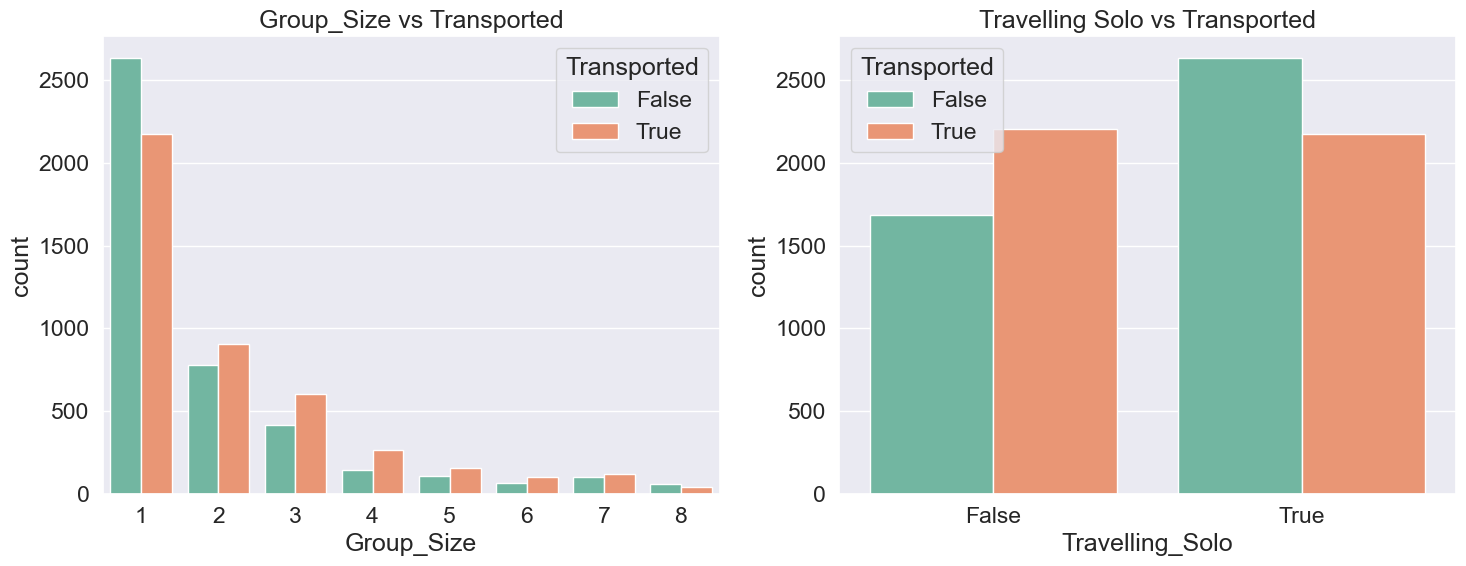

In [23]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 In the Group_Size feature, it's evident that most passengers are traveling alone.</li>
<li>💡 However, from the Travelling_Solo feature, we observe that passengers traveling solo are comparatively less transported when compared with passengers traveling in a group.</li>
</ul>
</div>


## 2. Creating New Feature using "Cabin" Feature

In [24]:
train_df["Cabin"].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>How will we do feature engineering on Cabin</h2>
<ul>
<li>💡 We understand that the cabin feature consists of deck/num/side, where deck represents the deck location, num represents the deck number, and side can be P for port or S for Starboard.</li>
<li>💡 To perform feature engineering on the Cabin feature, we will separate these three values and create three new features: Cabin_Deck, Cabin_Number, and Cabin_Side.</li>
<li>💡 Additionally, since the Cabin feature contains NaN values, we need to handle them appropriately to avoid errors during splitting. We will replace the NaN values in such a way that they can be split into all three new features accordingly.</li>
</ul>
</div>


In [25]:
def cabin_new_feature(df):
    # Temporarily fill NaNs in 'Cabin' to facilitate splitting
    df["Cabin"].fillna("Unknown/Unknown/Unknown", inplace=True)
    
    # Split 'Cabin' into new features
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"] = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    # Replace 'Unknown' with np.nan to facilitate numerical operations and maintain consistency
    cols = ["Cabin_Deck", "Cabin_Number", "Cabin_Side"]
    df[cols] = df[cols].replace("Unknown", np.nan)
    
    # Convert 'Cabin_Number' to numeric, errors='coerce' will convert non-numeric to NaN
    df["Cabin_Number"] = pd.to_numeric(df["Cabin_Number"], errors='coerce')
    
    # Fill missing values in new features
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0], inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0], inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(), inplace=True)


In [26]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

### Visualizing "Cabin_Deck" & "Cabin_Side" Feature.

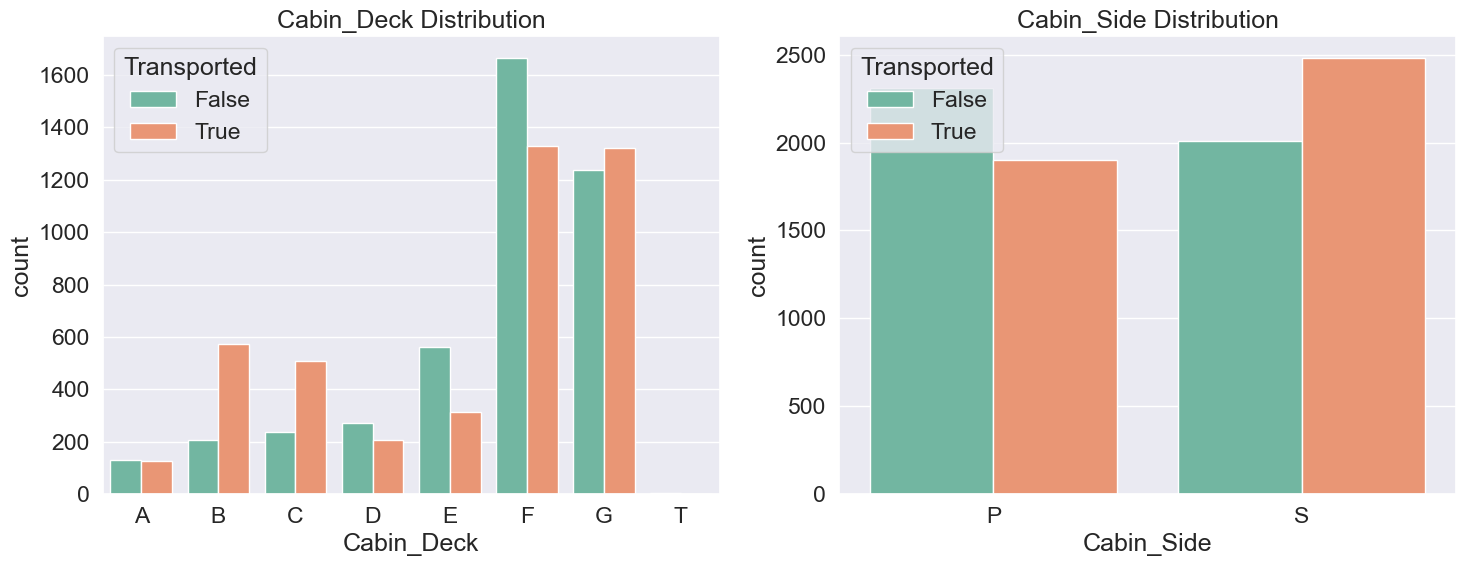

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Insights</h2>
<ul>
<li>💡 The majority of people are from Cabin_Deck F & G.</li>
<li>💡 There are very few passengers in Cabin_Deck T.</li>
<li>💡 Passengers from Cabin Deck B & C are transported at a high rate.</li>
<li>💡 From Cabin_Side, approximately half of the passengers were from cabin side S and half from cabin side P.</li>
<li>💡 However, passengers from cabin side S are transported at a higher rate compared to those from cabin side P, despite both sides having an equal number of passengers.</li>
</ul>
</div>


### Visualizing "Cabin_Number" Feature.

In [28]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

**Before visualizing let's do some Statistical analysis on Cabin_Number Feature**

In [29]:
print("Total Unique values present in Cabin_Number feature is:",train_df["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_df["Cabin_Number"].max())

Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  596.3989416772115
The Median of Cabin_Number Feature is: 427.0
The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


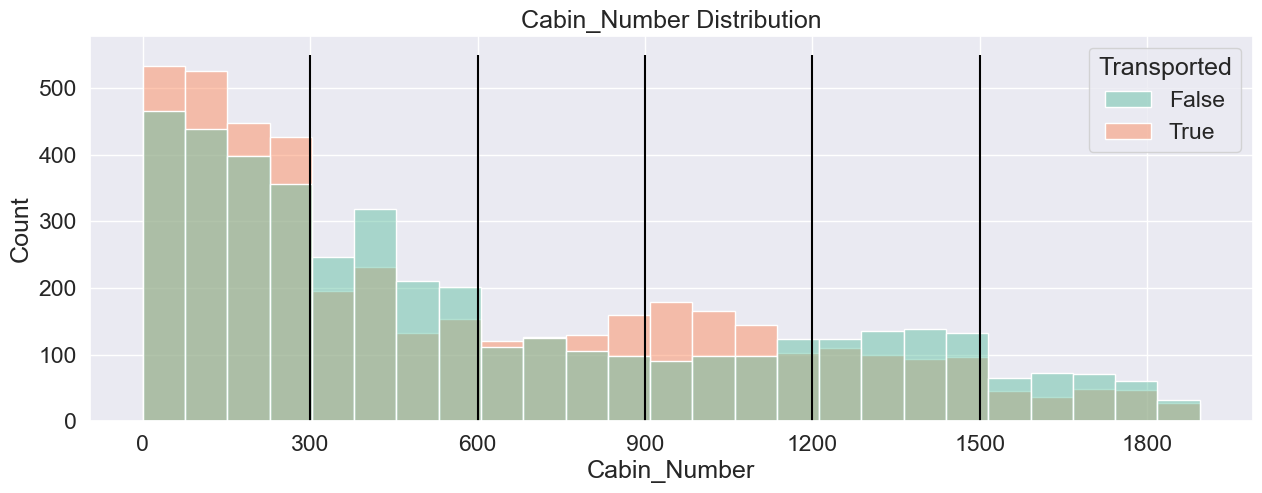

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Insights</h2>
<ul>
<li>💡 It's evident that Cabin_Number can be divided into different regions with groups of 300 passengers.</li>
<li>💡 Therefore, we can create a new feature called Cabin_Regions, which will indicate the passenger's cabin number region.</li>
</ul>
</div>


## 3. Creating New Feature "Cabin_Regions" From "Cabin_Number".

In [31]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [32]:
cabin_regions(train_df)
cabin_regions(test_df)

**We don't need Cabin_Number Feature anymore so we will drop this feature**

In [33]:
train_df.drop(columns=["Cabin_Number"],inplace=True)
test_df.drop(columns=["Cabin_Number"],inplace=True)

### Visualizing "Cabin_Region" Feature.

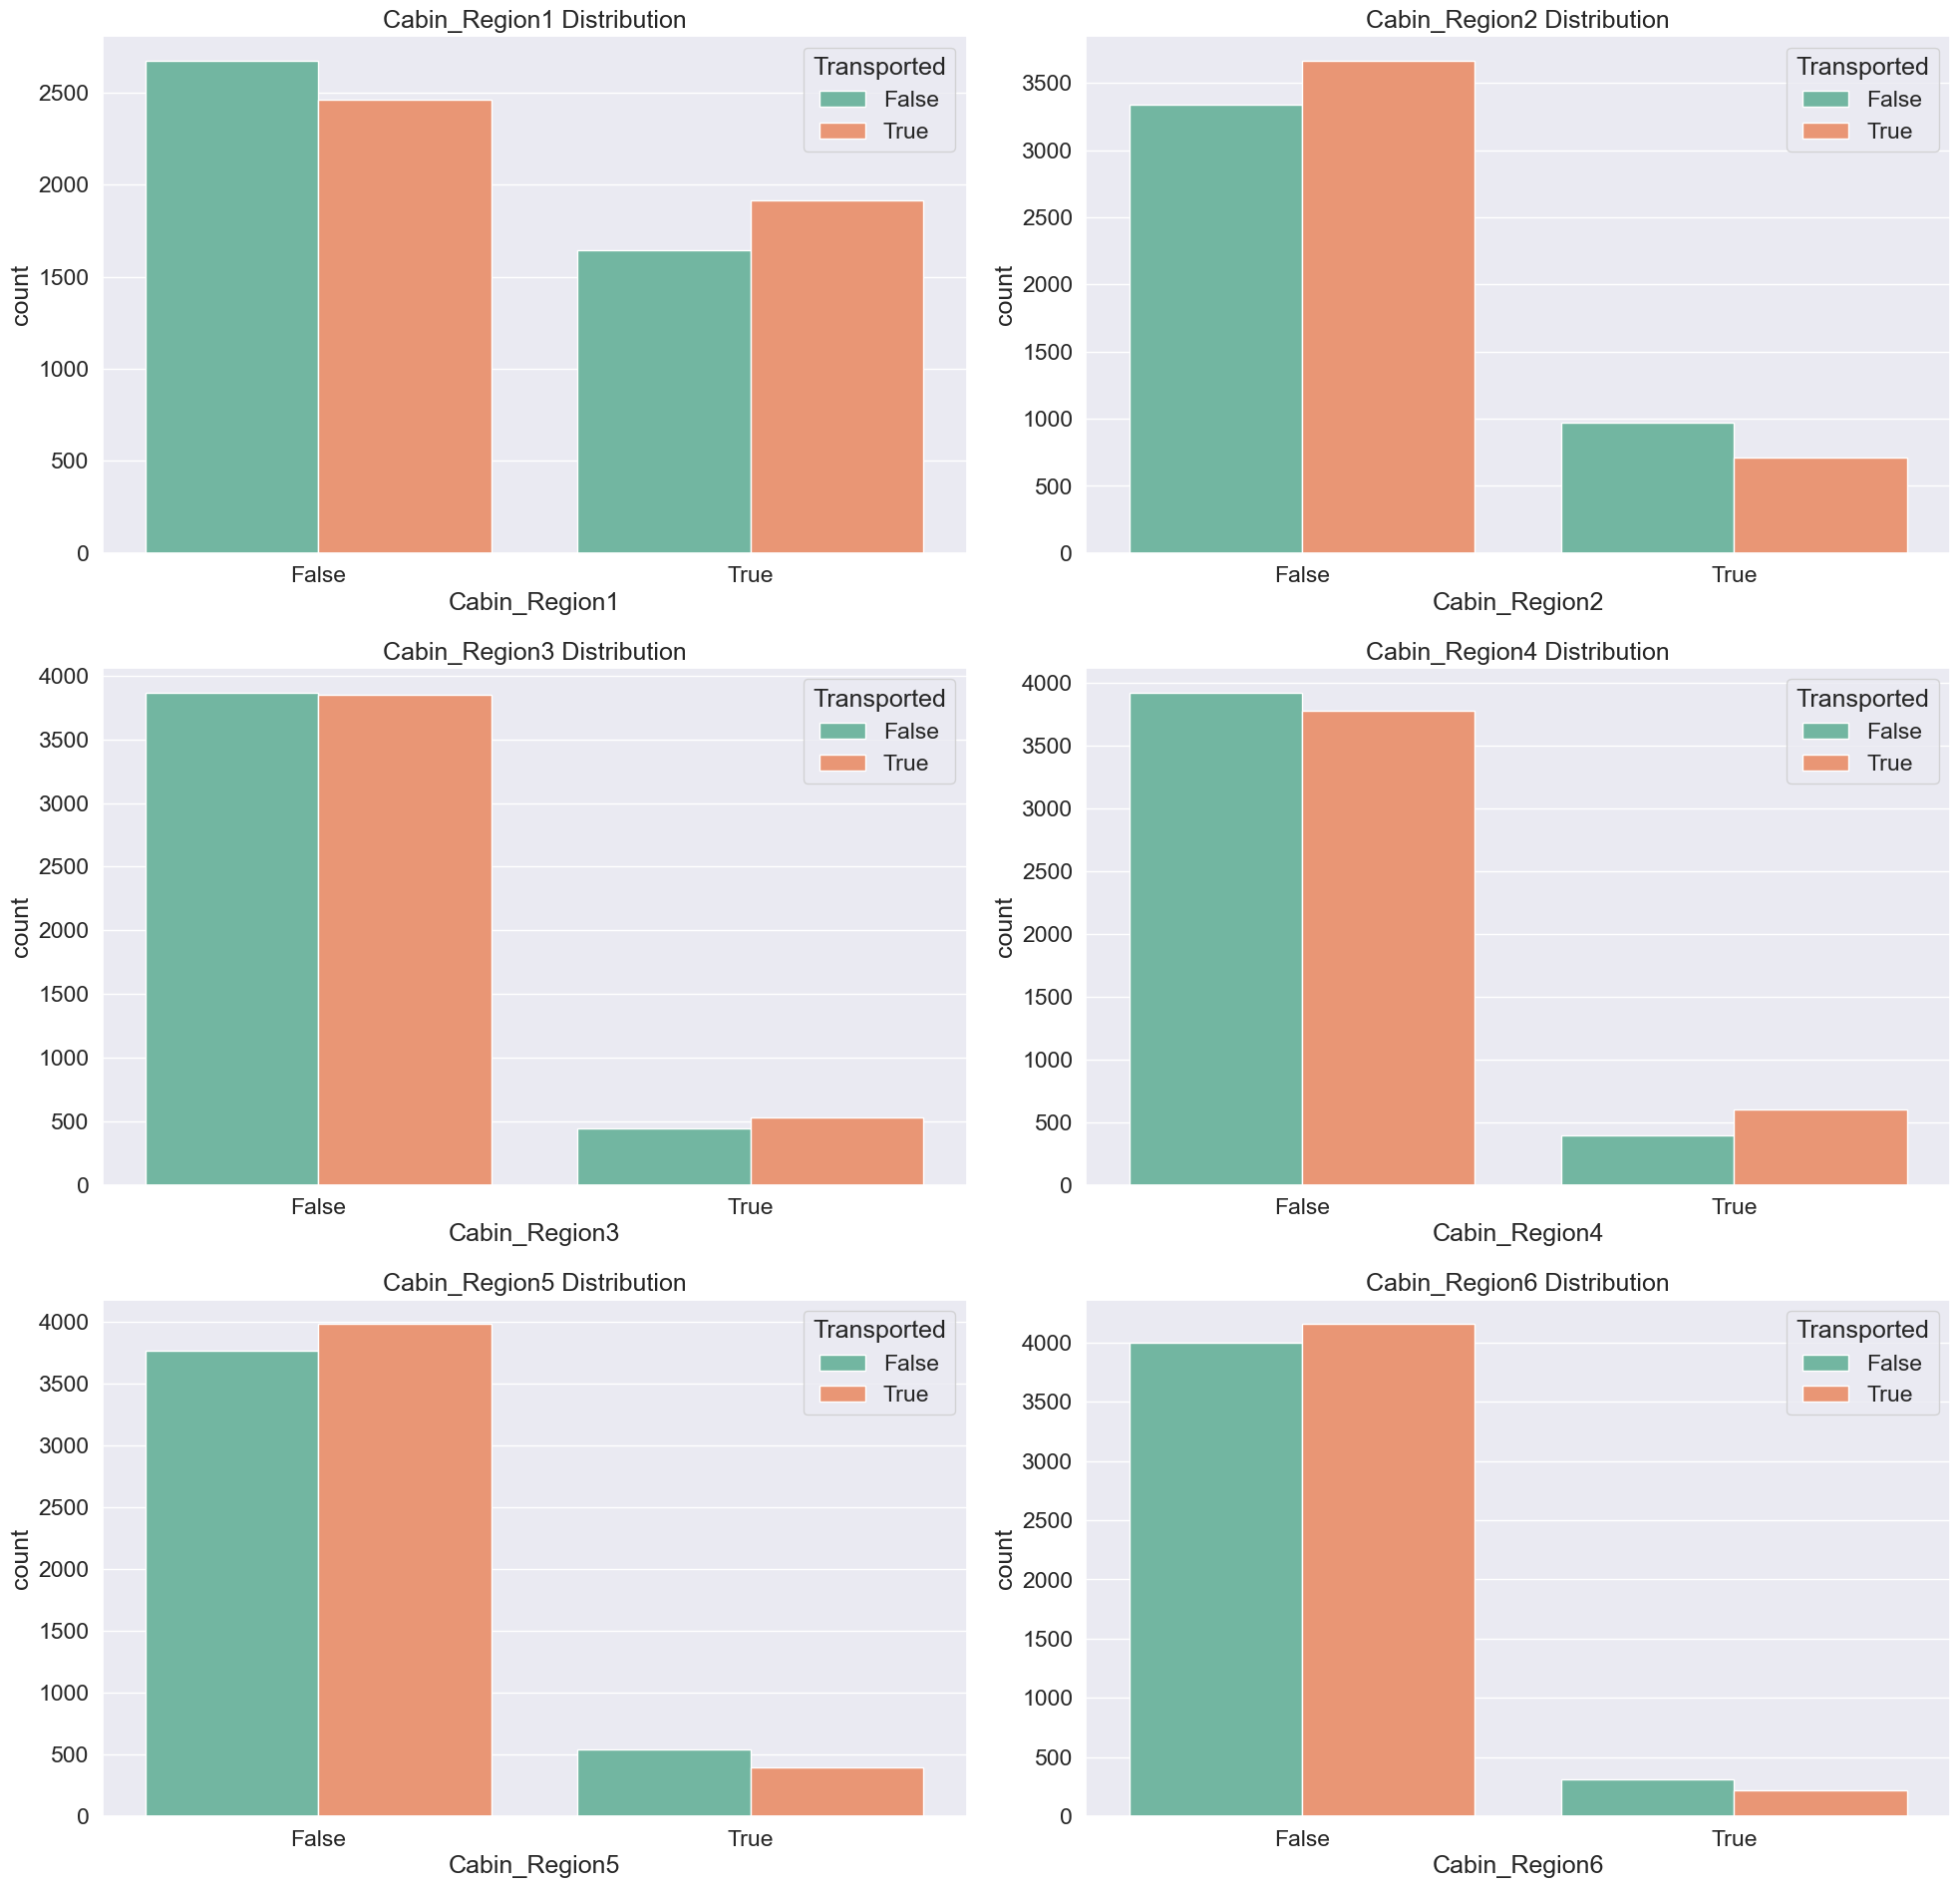

In [34]:
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 Passengers from Cabin_Region1 are highly transported compared to other cabin regions.</li>
<li>💡 Additionally, there is a noticeable decrease in passenger transportation as the cabin region number increases.</li>
</ul>
</div>

## 4. Creating New Feature From "Age"

In [35]:
train_df["Age"].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>How we will do feature engineering on Age Feature</h2>
<ul>
<li>💡 After conducting Exploratory Data Analysis (EDA) on the Age feature, we gathered insights suggesting that ages can be categorized into different groups based on transportation.</li>
<li>💡 Therefore, we will create a new feature called Age Group and split the Age into different groups based on the insights gained from EDA.</li>
</ul>
</div>


In [36]:
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
        
    df["Age Group"] = age_group

In [37]:
age_group(train_df)
age_group(test_df)

### Visualizing "Age Group" Feature.

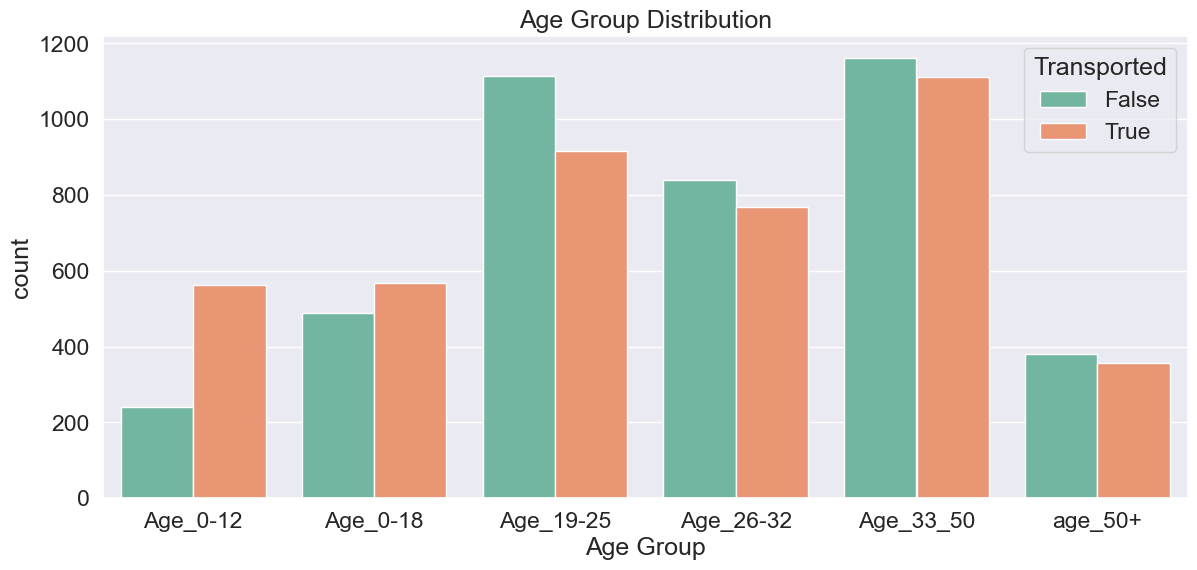

In [38]:
order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Age Group Distribution");

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Insights</h2>
<ul>
<li>💡 This new feature appears to be more relevant to our target data.</li>
<li>💡 Age groups 0-12 and 0-18 are more likely to be transported compared to not being transported.</li>
<li>💡 Age groups 19-25, 26-32, and 33-50 are less likely to be transported compared to not being transported.</li>
<li>💡 Age group 50+ is almost equally transported compared to not being transported.</li>
</ul>
</div>


## 5. Creating New Features Using All Expenditude Features.

In [39]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>How can we do feature engineering on all expenditure features</h2>
<ul>
<li>💡 During Exploratory Data Analysis (EDA) on these expenditure features, we gained several insights:</li>
  <ol type="1">
    <li>We can create a Total Expenditure feature by summing all the expenditures.</li>
    <li>We can create a boolean feature, No Spending, from the Total Expenditure feature, indicating True for passengers who have spent 0 expenses.</li>
    <li>We can split Total Expenditure into different categories, indicating whether the person has no expense, low expense, medium expense, or high expense, and create a new feature called Expenditure Category.</li>
  </ol>
</ul>
</div>


In [40]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)

In [41]:
new_exp_features(train_df)
new_exp_features(test_df)

### Visualizing "Total Expenditure" Feature.

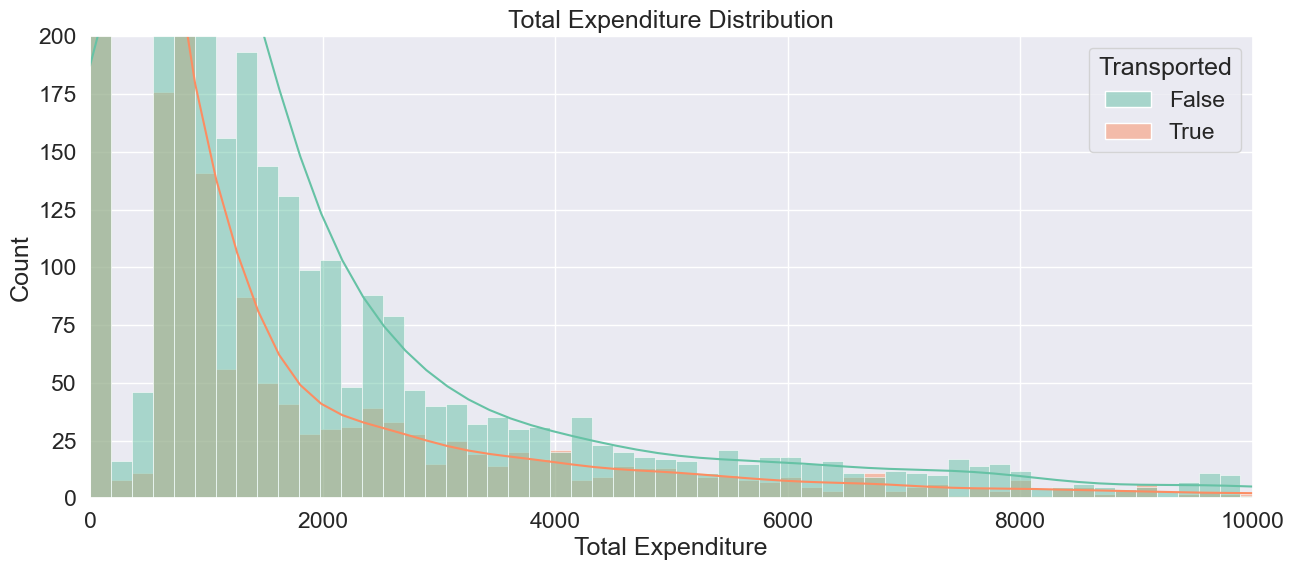

In [42]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=train_df, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution");

**Generating some statistical information from Total Expenditue feature**

In [43]:
mean = round(train_df["Total Expenditure"].mean())
median = train_df["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = ",mean)
print("Median value of Total Expenditure feature is = ",median)

Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure feature is =  716.0


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Insights</h2>
<ul>
<li>💡 Based on the measures of central tendency values provided above, we can categorize the Total Expenditure feature into different expense categories.</li>
<li>💡 If Total Expenditure is equal to 0, it falls into the No Expense category.</li>
<li>💡 If Total Expenditure is between 1 and 716, it falls into the Low Expense category.</li>
<li>💡 If Total Expenditure is between 717 and 1441, it falls into the Medium Expense category.</li>
<li>💡 If Total Expenditure is greater than 1441, it falls into the High Expense category.</li>
</ul>
</div>

In [44]:
def expenditure_category(df):
    expense_category = []
    
    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")
    
    df["Expenditure Category"] = expense_category

In [45]:
expenditure_category(train_df)
expenditure_category(test_df)

### Visualizing "No Spending" & "Expenditure Category" Features.

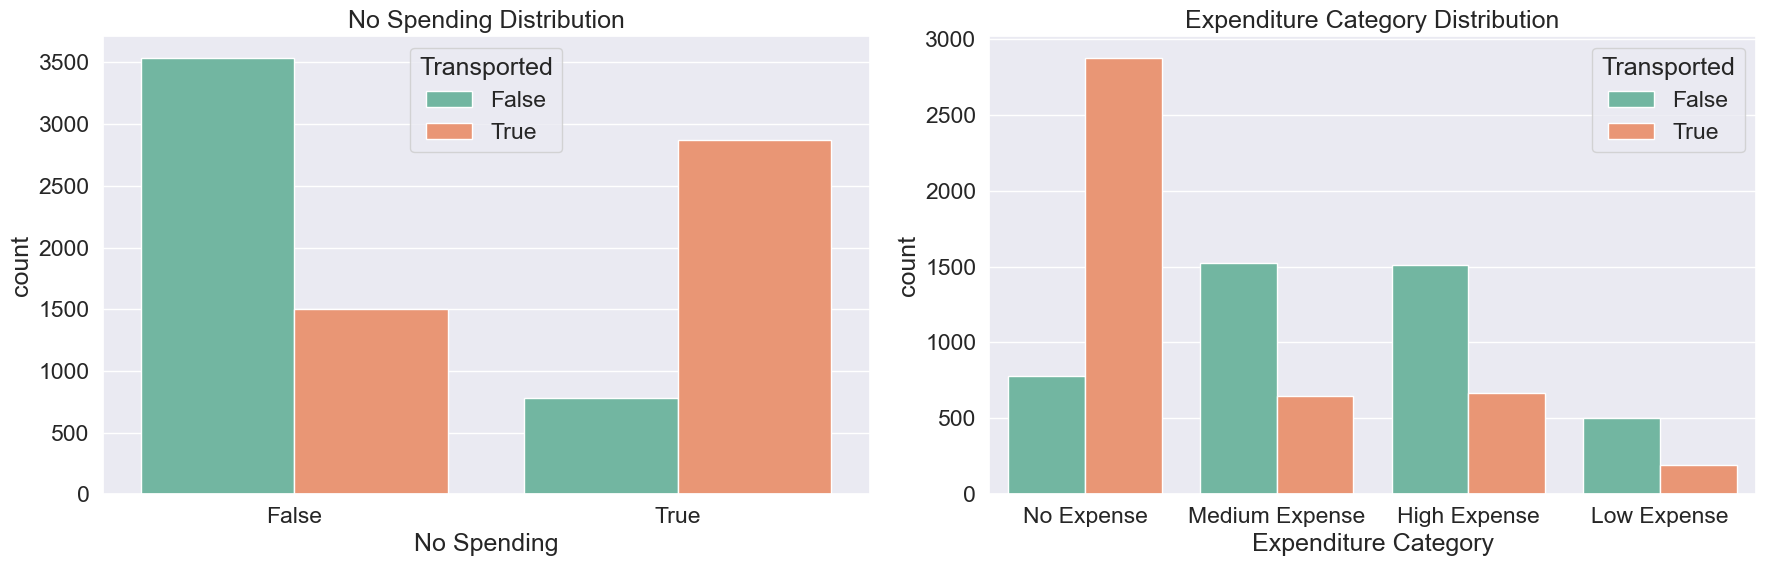

In [46]:
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 Regarding the Total Expenditure feature, passengers with lower total expenses are more likely to be transported frequently.</li>
<li>💡 For the No Spending feature, passengers with no spending are observed to be transported at a high frequency.</li>
<li>💡 In the Expenditure Category feature, it's confirmed that passengers with no expenses are transported most frequently.</li>
</ul>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Pre-Processing
</p>
</div>

### 1. Checking Missing Values.

In [47]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


### 4. Handling Missing Values.

In [48]:
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

In [49]:
print("Categorical Columns:",cat_cols)
print("\n","-"*120)
print("\nNumerical Columns:",num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'No Spending', 'Expenditure Category']

 ------------------------------------------------------------------------------------------------------------------------

Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total Expenditure']


**Using Simple Imputer Library to Fill Missing Values**

In [50]:
imputer1 = SimpleImputer(strategy="most_frequent")     ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [51]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [52]:
fill_missingno(train_df)
fill_missingno(test_df)

In [53]:
print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


### 5. Checking Duplicacy in Data.

In [54]:
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


### 6. Checking Cardinality of Categorical Features.

In [55]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age Group                  6
No Spending                2
Expenditure Category       4
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side               

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 With all feature engineering completed, it's time to drop features with high cardinality.</li>
<li>💡 Therefore, we will drop the PassengerId, Cabin, Name, Group, and Surname features.</li>
</ul>
</div>

**Dropping Categorical Features with High Cardinality**

In [56]:
##Extracting passengerId from test data because qe need this for submitting our predictions on kaggle.
pass_df = test_df[["PassengerId"]]

In [57]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

### 7. Gathering Statistical Information of Numerical Features.

In [58]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Observation</h2>
<ul>
<li>💡 We observe that in RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck, more than 50% of the data are equal to 0.</li>
<li>💡 During Exploratory Data Analysis (EDA), it was found that these features exhibit a right-skewed distribution.</li>
<li>💡 Hence, it can be inferred that there is a significant presence of outliers in these features.</li>
<li>💡 To address this issue, we propose transforming these features to a normal distribution using Log Transformation.</li>
<li>💡 Since we are applying log transformation to these expenditure features, it's necessary to also apply the transformation to Total Expenditure.</li>
<li>💡 This ensures that the model can better discern patterns within the data.</li>
</ul>
</div>


## 8. Applying Log Transformation on Expenditure Features.

In [59]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

### Visualizing these features after Transformation

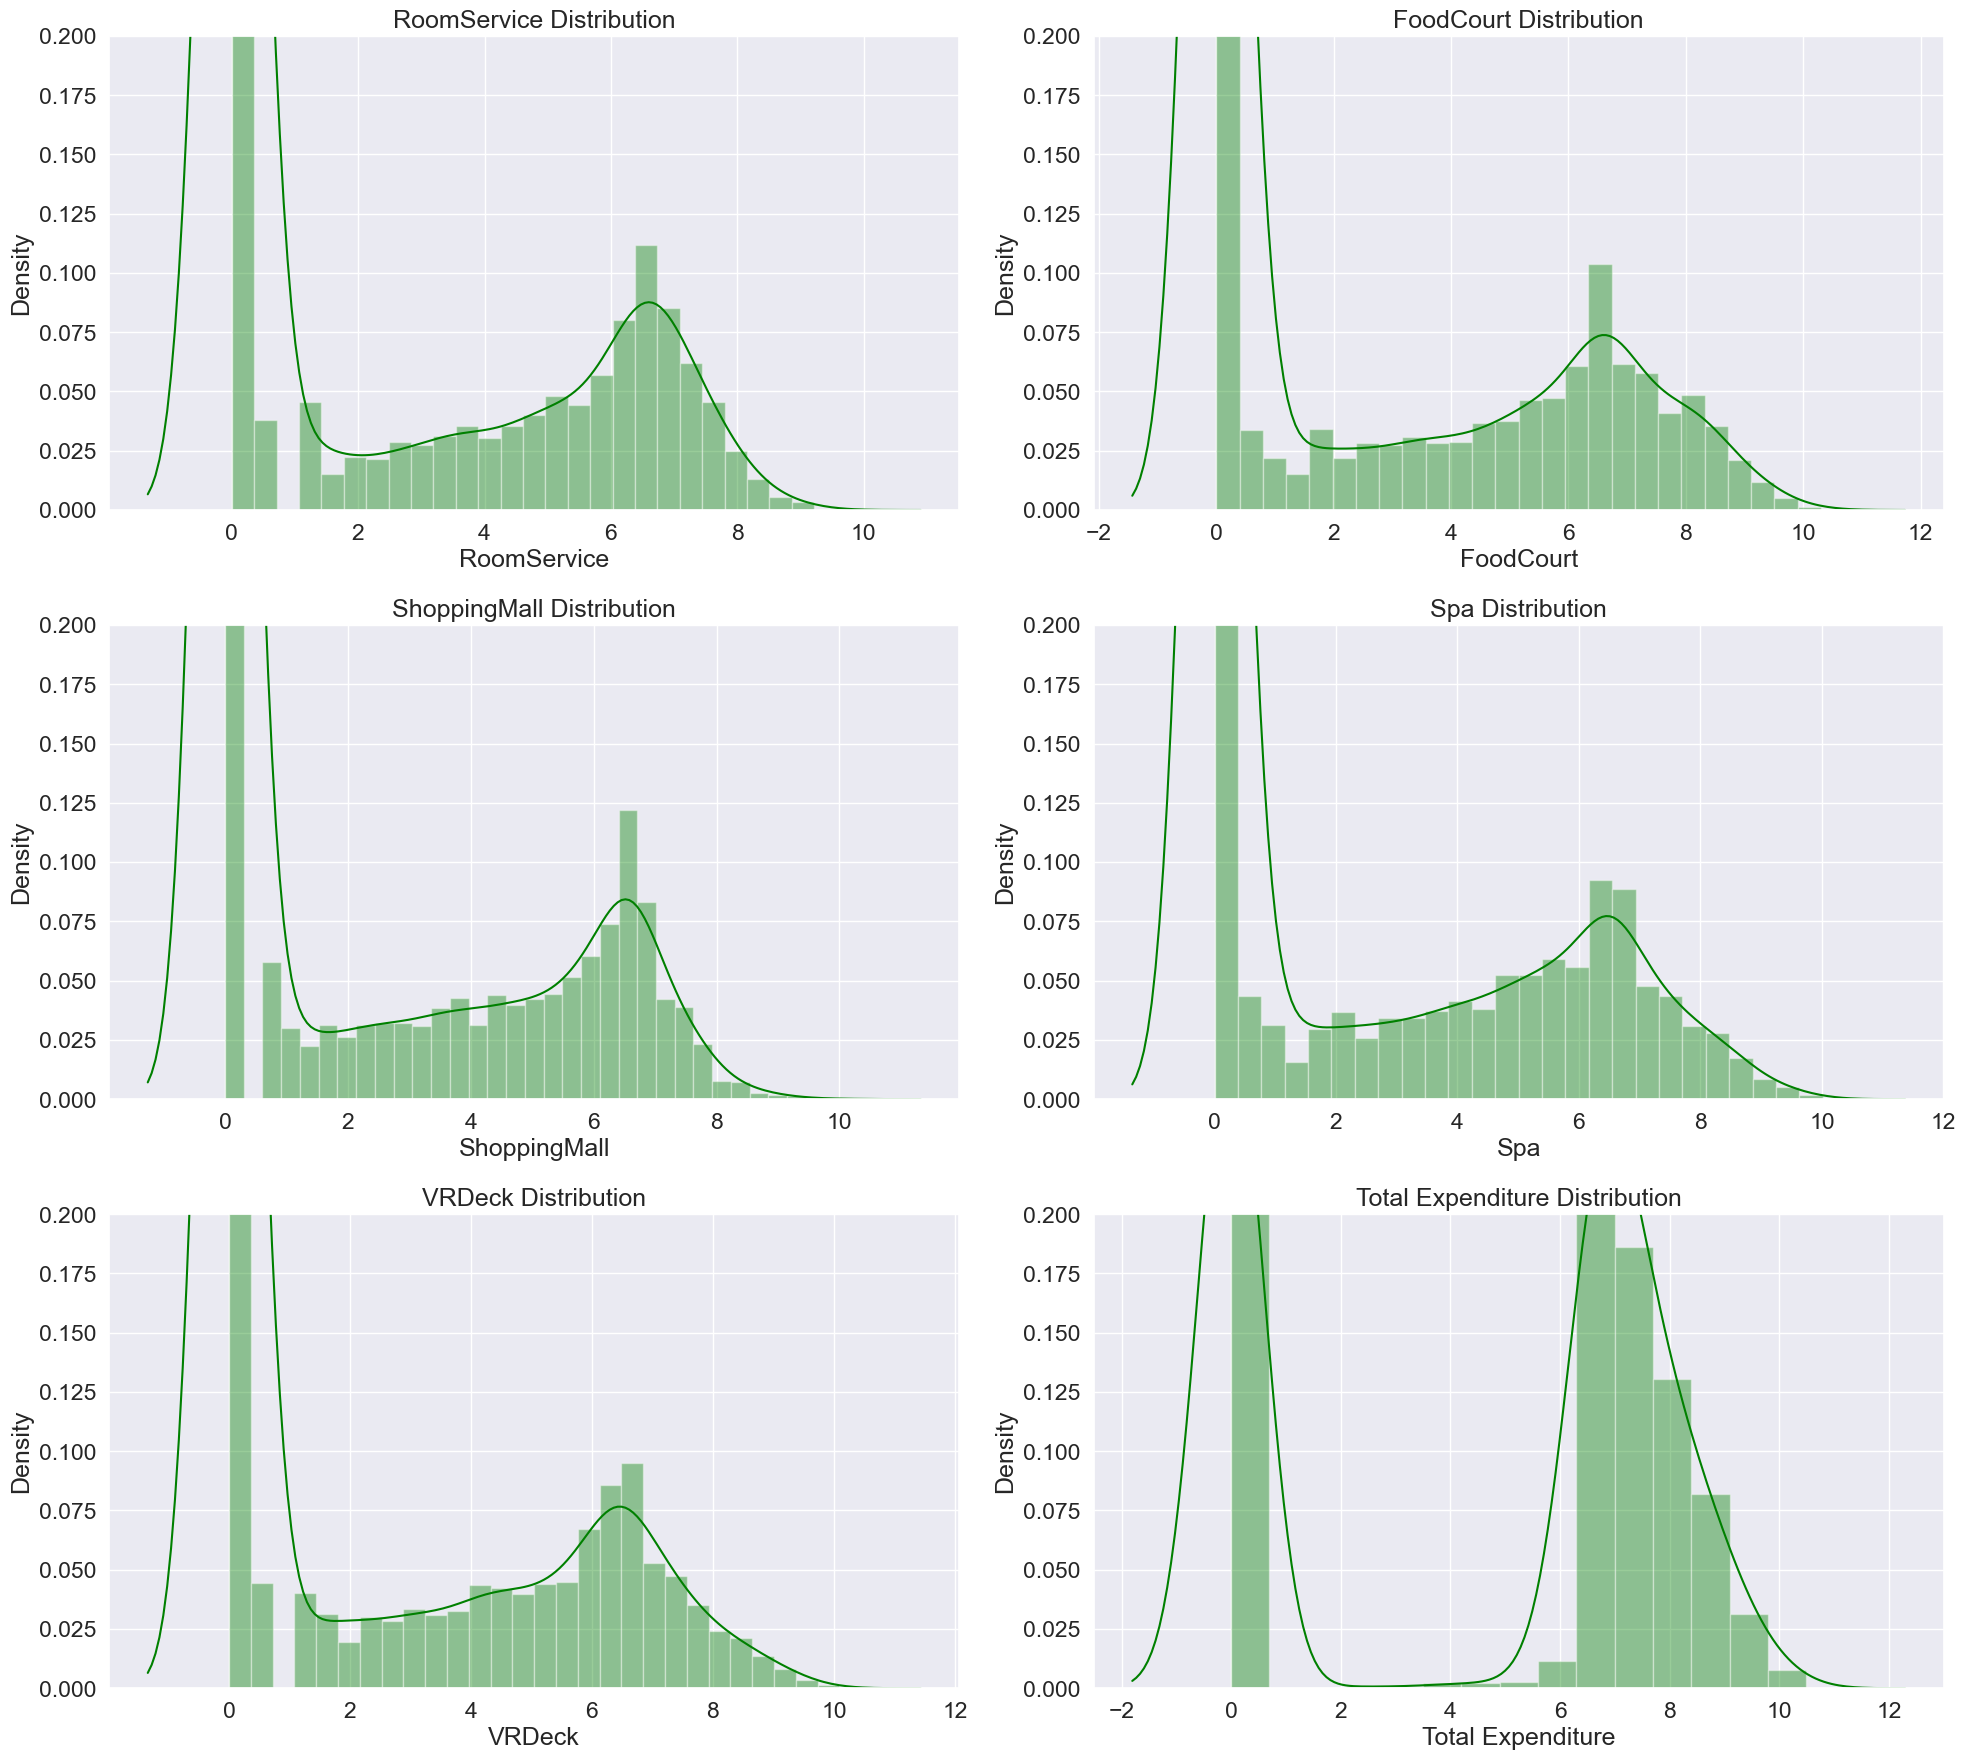

In [60]:
x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

### 9. Checking Data - Types of Features.

In [61]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age Group                object
Total Expenditure       float64
No Spending              object
Expenditure Category     object
dtype: object

<div style="font-family:Georgia;background-color:lavender; padding:30px; font-size:17px">

<h2>Note</h2>
<ul>
<li>💡 The features CryoSleep, VIP, Travelling_Solo, No Spending, Cabin_Region1, Cabin_Region2, Cabin_Region3, Cabin_Region4, Cabin_Region5, and Cabin_Region6 contain boolean values. Therefore, we need to change their data types, which will be beneficial when encoding our categorical features.</li>
</ul>
</div>


**Changing Data-Type to Boolean**

In [62]:
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

### 7. Feature Encoding

* We will do **One Hot Encoding** for nominal categorical features.
* We will do **LabelEncoding** for ordinal categorical features.

In [63]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending",
                    "Expenditure Category"]

**Label Encoding**

In [64]:
enc = LabelEncoder()

In [65]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

**One Hot Encoding**

In [66]:
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)


**Note**
* We still have one feature **Transported** left for encoding in training dataset.

In [67]:
train_df["Transported"].replace({False:0,True:1},inplace=True)

**Checking all features are encoded or not**

In [68]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,False,True,False,False,False,True
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,True,False,False,False,False,True
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,False,True,False,False,False,True
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,2.0,0,1,1,0,0,0,0,0,4,8.551981,0,0,False,True,False,False,False,True
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,True,False,False,False,False,True


In [69]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,6,1,1,0,0,0,0,0,3,0.000000,1,3,True,False,False,False,False,True
1,0,19.0,0,0.000000,2.302585,0.000000,7.945910,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,7.949091,0,0,True,False,False,False,False,True
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,2,1,1,0,0,0,0,0,3,0.000000,1,3,False,True,False,True,False,False
3,0,38.0,0,0.000000,8.802823,0.000000,5.204007,6.37332,1,1.0,2,1,1,0,0,0,0,0,4,8.911800,0,0,False,True,False,False,False,True
4,0,20.0,0,2.397895,0.000000,6.455199,0.000000,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,6.470800,0,1,True,False,False,False,False,True


### 8. Selecting Features & Labels For Model Training.

In [70]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

### 9. Feature Scaling

In [71]:
scaler = StandardScaler()

In [72]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

### 10. Splitting Data For Model Which Don't Need Scaled Data.

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
print(x_train.shape, y_train.shape)

(6954, 28) (6954, 1)


In [75]:
print(x_test.shape,y_test.shape)

(1739, 28) (1739, 1)


### 11. Splitting Data For Model Which Need Scaled Data.

In [76]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [77]:
print(x_train1.shape, y_train1.shape)

(6954, 28) (6954, 1)


In [78]:
print(x_test1.shape, y_test1.shape)

(1739, 28) (1739, 1)


---

In [86]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the SVM model
svm_model = SVC(random_state=0)

# Train the model
svm_model.fit(x_train1, y_train1)

# Evaluate the model
accuracy = svm_model.score(x_test1, y_test1)
print(f"Accuracy of SVM model: {accuracy:.2f}")

pred = svm_model.predict(test_df_scaled)

pass_df["Transported"] = pred
pass_df["Transported"].replace({1:True,0:False},inplace=True)
pass_df.to_csv("svm_standard.csv",index=False)

Accuracy of SVM model: 0.77


In [100]:
print(x_train1, y_train1)

[[-0.73277002  1.75792822 -0.15306307 ...  1.95689664 -0.31748665
  -1.5325186 ]
 [-0.73277002 -0.61296624 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]
 [-0.73277002  0.99087413 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]
 ...
 [-0.73277002  0.01462347 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]
 [-0.73277002 -2.00761004 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]
 [-0.73277002  1.13033851 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]]       Transported
4278            0
5971            0
464             0
4475            0
8469            1
557             1
3586            1
470             1
4757            0
874             0
5504            0
5098            1
1642            1
2164            1
4391            1
5556            0
8672            0
7750            1
3269            0
4083            1
7978            0
31              0
5412            1
8589            1
7053            1
8547            0
6428            0
418 

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

class CustomPrintCallback(Callback):
    def __init__(self):
        super(CustomPrintCallback, self).__init__()
        self.best_acc = -np.inf
        self.best_loss = np.inf
        self.best_val_acc = -np.inf
        self.best_val_loss = np.inf

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')
        current_acc = logs.get('accuracy')
        current_val_loss = logs.get('val_loss')
        current_val_acc = logs.get('val_accuracy')

        # Check for improvements and update best metrics
        if current_acc > self.best_acc or current_val_acc > self.best_val_acc:
            self.best_acc = max(self.best_acc, current_acc)
            self.best_loss = min(self.best_loss, current_loss)
            self.best_val_acc = max(self.best_val_acc, current_val_acc)
            self.best_val_loss = min(self.best_val_loss, current_val_loss)

        # Print the best metrics so far
        print(f"After {epoch+1} epochs: Best Loss: {self.best_loss:.4f}, Best Accuracy: {self.best_acc:.4f}, "
                f"Best Val Loss: {self.best_val_loss:.4f}, Best Val Accuracy: {self.best_val_acc:.4f}")
        
def create_model(input_shape, layers, activation, dropout_rate, l1_reg, l2_reg, learning_rate):
    model = Sequential()
    for i, layer_size in enumerate(layers):
        if i == 0:
            model.add(Dense(layer_size, activation=activation, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg), input_shape=(input_shape,)))
        else:
            model.add(Dense(layer_size, activation=activation, kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(model, X_train, y_train, X_val, y_val, batch_size, epochs, class_weight, lr_schedule):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(lr_schedule)
    
    custom_print_callback = CustomPrintCallback() 

    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
              validation_data=(X_val, y_val), class_weight=class_weight, 
              callbacks=[early_stopping, lr_scheduler], verbose=0)
    

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    return val_loss, val_acc

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0005
    else:
        return 0.0001


# Handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train1, y_train1)

# Define the hyperparameter search space
dimensions = [
    Integer(2, 6, name='layers'),
    Integer(64, 1024, name='units'),
    Categorical(['relu', 'selu', 'elu'], name='activation'),
    Real(0.2, 0.6, name='dropout_rate'),
    Real(1e-6, 1e-3, name='l1_reg', prior='log-uniform'),
    Real(1e-6, 1e-3, name='l2_reg', prior='log-uniform'),
    Real(1e-5, 1e-3, name='learning_rate', prior='log-uniform')
]

@use_named_args(dimensions=dimensions)
def fitness(layers, units, activation, dropout_rate, l1_reg, l2_reg, learning_rate):
    layers = [units] * layers
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    val_accuracies = []
    
    for train_index, val_index in kfold.split(X_resampled, y_resampled):
        X_train, X_val = X_resampled[train_index], X_resampled[val_index]
        y_train, y_val = y_resampled[train_index], y_resampled[val_index]
        
        class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight_dict = dict(enumerate(class_weights))
        
        model = create_model(input_shape=X_train.shape[1], layers=layers, activation=activation,
                             dropout_rate=dropout_rate, l1_reg=l1_reg, l2_reg=l2_reg, learning_rate=learning_rate)
        _, val_acc = train_and_evaluate(model, X_train, y_train, X_val, y_val, 
                                        batch_size=32, epochs=100, class_weight=class_weight_dict, lr_schedule=lr_schedule)
        val_accuracies.append(val_acc)
    
    return -np.mean(val_accuracies)

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress most TensorFlow logs, except for errors
tf.get_logger().setLevel('ERROR')  # Suppress TensorFlow warnings

# Perform Bayesian Optimization
n_calls = 10
best_result = gp_minimize(func=fitness, dimensions=dimensions, n_calls=n_calls, 
                          random_state=42, verbose=True)

# Retrieve the best hyperparameters
best_params = {
    'layers': [best_result.x[1]] * best_result.x[0],
    'activation': best_result.x[2],
    'dropout_rate': best_result.x[3],
    'l1_reg': best_result.x[4],
    'l2_reg': best_result.x[5],
    'learning_rate': best_result.x[6]
}
best_val_acc = -best_result.fun

# Train the enhanced model with the best parameters found
model_enhanced = create_model(input_shape=X_resampled.shape[1], **best_params)
class_weight_dict = compute_class_weight('balanced', np.unique(y_resampled), y_resampled)
model_enhanced.fit(X_resampled, y_resampled, epochs=100, batch_size=32, class_weight=class_weight_dict)

print(f"Best Validation Accuracy: {best_val_acc}")
print(f"Best Hyperparameters: {best_params}")


Iteration No: 1 started. Evaluating function at random point.


KeyError: "None of [Index([   0,    2,    3,    5,    6,    7,    9,   10,   12,   13,\n       ...\n       6992, 6994, 6996, 6997, 6998, 6999, 7000, 7001, 7002, 7003],\n      dtype='int64', length=5603)] are in the [columns]"